In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try reading with a different encoding
df = pd.read_csv('SuperStore_Sales_Dataset.csv', encoding='latin1')

# Preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,01-01-19,07-01-19,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online
1,4919,CA-2019-160304,02-01-19,07-01-19,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online
2,4920,CA-2019-160304,02-01-19,07-01-19,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards
3,3074,CA-2019-125206,03-01-19,05-01-19,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online
4,8604,US-2019-116365,03-01-19,08-01-19,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online


 Step 2: Understand the Data Structure

In [396]:
df.shape

(5901, 21)

In [398]:
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [399]:
df.info()      # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         5901 non-null   int64  
 1   Order ID       5901 non-null   object 
 2   Order Date     5901 non-null   object 
 3   Ship Date      5901 non-null   object 
 4   Ship Mode      5901 non-null   object 
 5   Customer ID    5901 non-null   object 
 6   Customer Name  5901 non-null   object 
 7   Segment        5901 non-null   object 
 8   Country        5901 non-null   object 
 9   City           5901 non-null   object 
 10  State          5901 non-null   object 
 11  Region         5901 non-null   object 
 12  Product ID     5901 non-null   object 
 13  Category       5901 non-null   object 
 14  Sub-Category   5901 non-null   object 
 15  Product Name   5901 non-null   object 
 16  Sales          5901 non-null   float64
 17  Quantity       5901 non-null   int64  
 18  Profit  

In [402]:
df.describe()     # Summary stats for numerical col

,Row ID,Sales,Quantity,Profit,Returns
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0
std,2877.977184,474.260645,2.212917,259.589138,0.0
min,1.000000,0.836000,1.000000,-6599.978000,1.0
25%,2486.000000,71.976000,2.000000,1.795500,1.0
50%,5091.000000,128.648000,3.000000,8.502500,1.0
75%,7456.000000,265.170000,5.000000,28.615000,1.0
max,9994.000000,9099.930000,14.000000,8399.976000,1.0


 Step 3: Clean the Data

 Step 3: Clean the Data

In [406]:
# Check for duplicates
df.duplicated().sum()

0

In [408]:
# Drop duplicates
# df = df.drop_duplicates()

In [410]:
# Check for missing values
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns          5614
Payment Mode        0
dtype: int64

In [412]:
df.drop(columns=['Returns'], inplace=True)

In [414]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,4918,CA-2019-160304,01-01-19,07-01-19,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online
1,4919,CA-2019-160304,02-01-19,07-01-19,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online


EXPLORATORY DATA ANALYSIS

1)- Univariate Analysis

In [418]:
df['Region'].value_counts()

Region
West       1901
East       1688
Central    1381
South       931
Name: count, dtype: int64

<Axes: title={'center': 'Order Count by Region'}, xlabel='Region'>

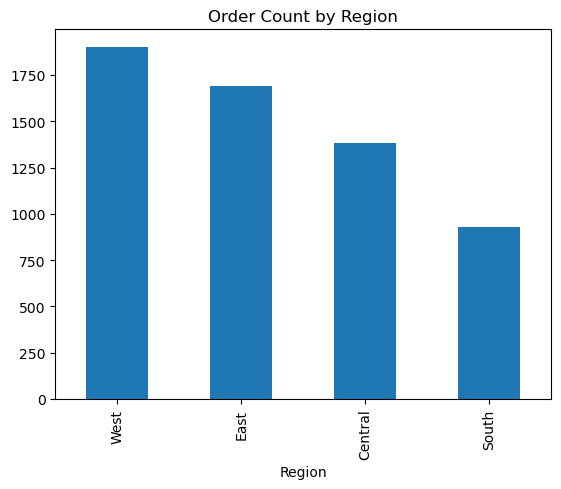

In [420]:
df['Region'].value_counts().plot(kind='bar', title='Order Count by Region')


In [422]:
df['Sales'].value_counts()

Sales
12.960      17
32.400       9
10.368       9
25.920       8
15.552       7
            ..
3.690        1
4.356        1
9.328        1
9.392        1
2975.510     1
Name: count, Length: 5109, dtype: int64

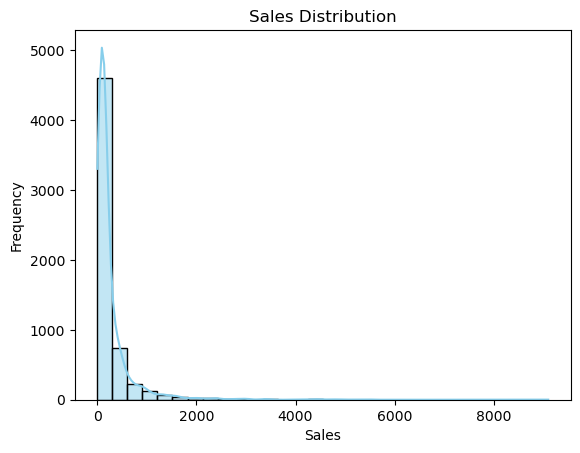

In [424]:


sns.histplot(df['Sales'], kde=True, bins=30, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [425]:
df['Quantity'].value_counts()

Quantity
2     1397
3     1392
5      764
4      703
1      563
7      362
6      305
8      177
9      151
10      29
11      16
14      15
12      14
13      13
Name: count, dtype: int64

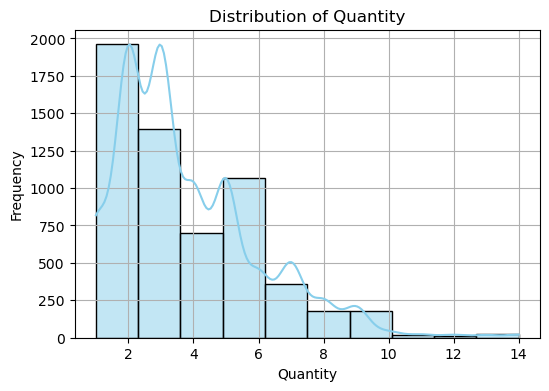

In [428]:

plt.figure(figsize=(6,4))
sns.histplot(df['Quantity'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [429]:
df['Payment Mode'].value_counts()


Payment Mode
COD       2453
Online    2164
Cards     1284
Name: count, dtype: int64

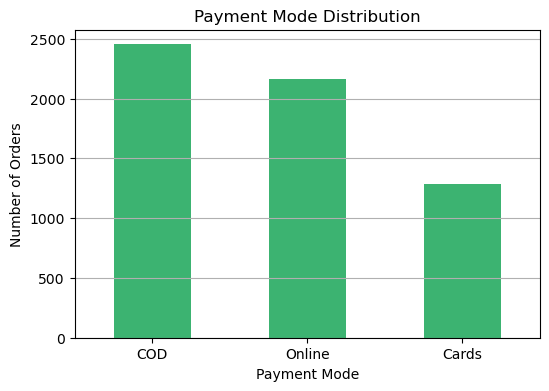

In [432]:
plt.figure(figsize=(6,4))
df['Payment Mode'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


: Bivariate Analysis

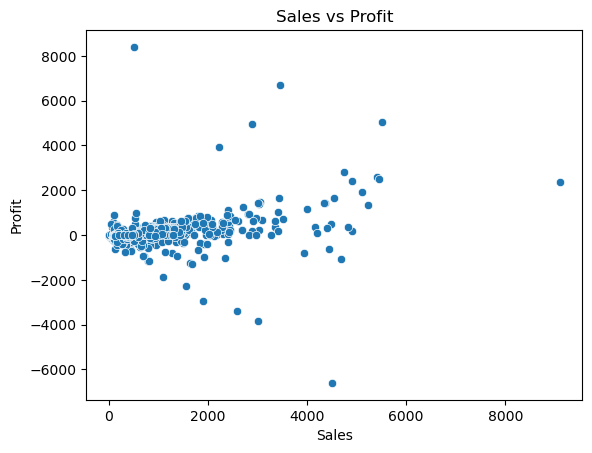

In [435]:
#Sales vs Profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()


Sales by Category

<Axes: title={'center': 'Total Sales by Category'}, xlabel='Category'>

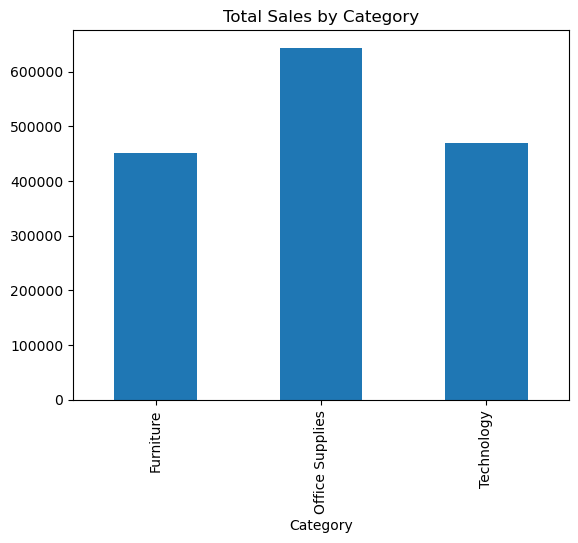

In [438]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Total Sales by Category')


In [439]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)


In [442]:
region_sales

Region
West       522441.0520
East       450234.6660
Central    341007.5242
South      252121.0810
Name: Sales, dtype: float64

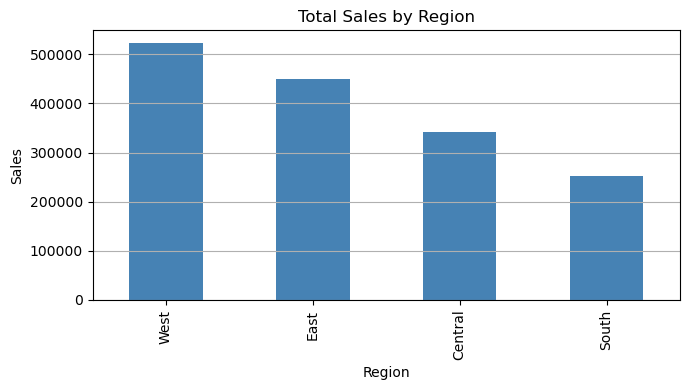

In [444]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
region_sales.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [446]:
region_profit

Region
West       67859.9582
East       53400.4243
Central    27450.0071
South      26551.7163
Name: Profit, dtype: float64

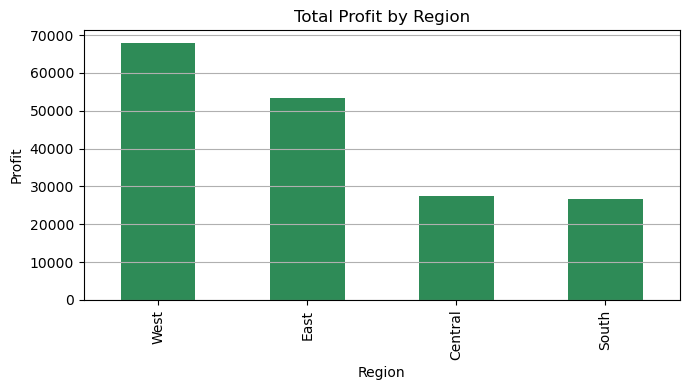

In [448]:
plt.figure(figsize=(7,4))
region_profit.plot(kind='bar', color='seagreen')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [449]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)


In [452]:
category_sales

Category
Office Supplies    643707.6870
Technology         470587.9910
Furniture          451508.6452
Name: Sales, dtype: float64

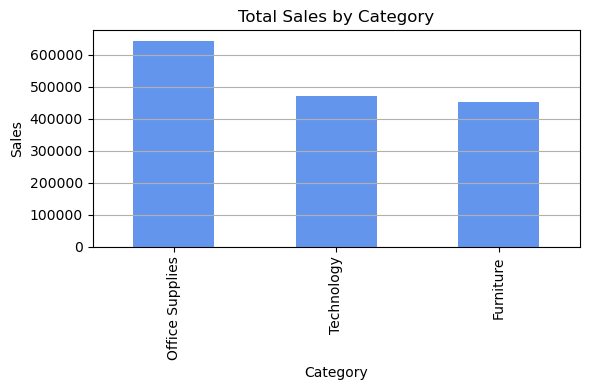

In [454]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
category_sales.plot(kind='bar', color='cornflowerblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [456]:
category_profit

Category
Technology         90458.2486
Office Supplies    74797.2461
Furniture          10006.6112
Name: Profit, dtype: float64

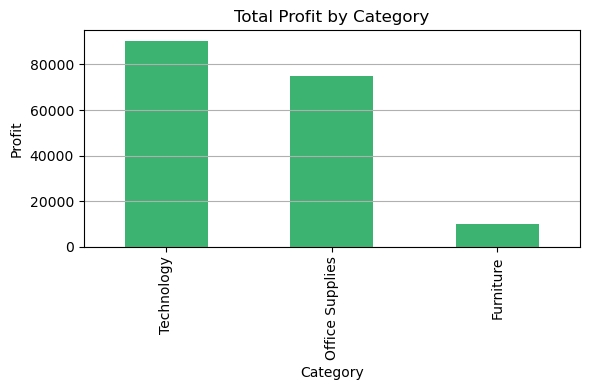

In [458]:
plt.figure(figsize=(6,4))
category_profit.plot(kind='bar', color='mediumseagreen')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


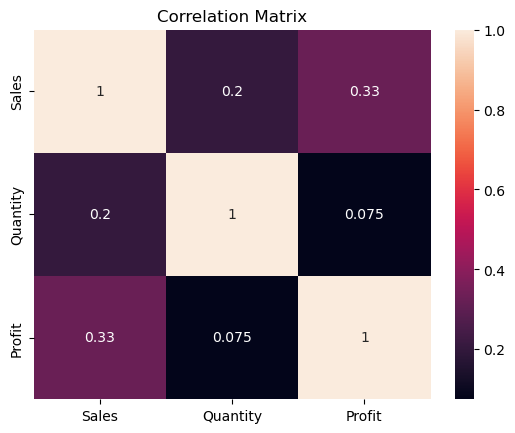

In [466]:
sns.heatmap(df[['Sales', 'Quantity', 'Profit']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()
